# **Decision Trees**

# **2.2** ***Text Data:***

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline 

from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Load Data
text_data = pd.read_csv('/content/text_data.csv') # Read data remember (meta_author will be the target)
text_data.head()

,Unnamed: 0,meta_author,meta_title,000,10,11,13,136,13th,1648,...,yielding,yoke,yokes,york,young,yourselves,zaleucus,zeal,zealand,zealous
0,0,hamilton,general introduction for the independent journ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3,0,0
1,1,jay,concerning dangers from foreign force and infl...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,jay,the same subject continued concerning dangers ...,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [ ]:
# Encode
X = text_data.iloc[:, 3:8563] # All columns everything except meta & title
le = preprocessing.LabelEncoder()
labels = text_data['meta_author']
le.fit(labels)
y=le.transform(labels)
 

In [ ]:
# Create the decision tree here Randomstate=42 90% training and 10% testing
# Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
# Standard Decision Tree
clf_control = tree.DecisionTreeClassifier()
clf_control = clf_control.fit(x_train,y_train)

In [ ]:
# Training Accuracy of Standard Decision Tree
clf_control.score(x_train, y_train)

1.0

In [ ]:
# Testing Accuracy of Standard Decision Tree
clf_control.score(x_test, y_test)

0.4444444444444444


The standard decision tree outputs an accuracy of 44% with a 90/10 train/test split. 

In [ ]:
#Create a loop of max depth from 1 to 16 similar to previous step and plot the accuracy 
train_errors = list()
test_errors = list()


for x in range(1,16): # Tree depth is varied in a loop from 3 to 10
  
  #Create multiple models here each based on the x variable above
  clf = tree.DecisionTreeClassifier(max_depth=x)
  clf = clf.fit(x_train,y_train)

  # Store the result of modes in train_erors and test_errors variables
  train_errors.append(clf.score(x_train, y_train)) # Train Accuracy
  test_errors.append(clf.score(x_test, y_test))    # Test Accuracy

  

In [ ]:
# Accuracy of test set
test_errors

[0.3333333333333333,
 0.2222222222222222,
 0.6666666666666666,
 0.3333333333333333,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.6666666666666666,
 0.3333333333333333,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.6666666666666666,
 0.6666666666666666]

Text(0, 0.5, 'Performance')

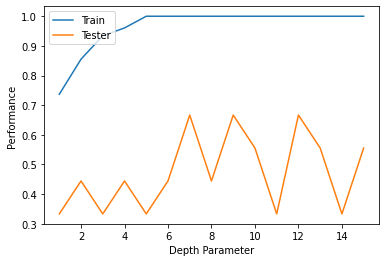

In [ ]:
# Plot of test and training errors
plt.plot(range(1,16),train_errors, label='Train')
plt.plot(range(1,16),test_errors, label='Tester')
plt.legend(loc='upper left')
plt.xlabel('Depth Parameter')
plt.ylabel('Performance')

In [ ]:
# With a simple code, you can see the frequency of the words
text_frequecies = X.sum()
text_frequecies = text_frequecies.sort_values()
display(text_frequecies)
kept_words = text_frequecies[text_frequecies<2]
# this line (above) first creates a binary vector for each word, telling us if it appears twice or more
# in the dataset. it then uses that vector to index into text_frequencies to subset only the data
# for which this binary vector evaluates to TRUE. This simple indexing can really help to chop through
# a huge pandas dataframe.
print(kept_words)
small_vocab_X= X [kept_words.index]
# notice how kept_words.index is a list of strings, the same you can use to access the headers of X..

inquest         1
devolving       1
devote          1
pact            1
packet          1
             ... 
other         646
all           731
state         786
government    829
states        851
Length: 8560, dtype: int64

inquest           1
devolving         1
devote            1
pact              1
packet            1
                 ..
citadel           1
semicolon         1
watchfulness      1
circumstantial    1
achieved          1
Length: 2975, dtype: int64


Text(0, 0.5, 'Performance')

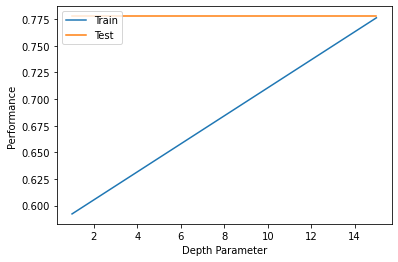

In [ ]:
# Now repeat the previous analysis (design model by changing the model depth 
#from 1 to 16) with smaller word dataset small_vocab_X

x_train_s, x_test_s, y_train, y_test = train_test_split(small_vocab_X, y, test_size=0.10, random_state=42)


#Create a loop of max depth from 1 to 16 similar to previous step and plot the accuracy 
train_errors_s = list()
test_errors_s = list()

for x in range(1,16): # Tree depth is varied in a loop from 3 to 10
  
  #Create multiple models here each based on the x variable above
  small_clf = tree.DecisionTreeClassifier(max_depth=x)
  small_clf = small_clf.fit(x_train_s,y_train)

  # Store the result of modes in train_erors and test_errors variables
  train_errors_s.append(small_clf.score(x_train_s, y_train)) # Train Errors
  test_errors_s.append(small_clf.score(x_test_s, y_test))    # Test Errors

# Plot of test and training errors
plt.plot(range(1,16),train_errors_s, label='Train') # Train Accuracy
plt.plot(range(1,16),test_errors_s, label='Test') # Test Accuracy
plt.legend(loc='upper left')
plt.xlabel('Depth Parameter')
plt.ylabel('Performance')




**Most frequent words**

In [ ]:
# Same as before create the most frequent words
kept_words2 = text_frequecies[text_frequecies>100]
# this line (above) first creates a binary vector for each word, telling us if it appears twice or more
# in the dataset. it then uses that vector to index into text_frequencies to subset only the data
# for which this binary vector evaluates to TRUE. This simple indexing can really help to chop through
# a huge pandas dataframe.
print(kept_words2)
large_vocab_X= X [kept_words2.index]

principles      101
often           102
jurisdiction    103
right           103
court           104
               ... 
other           646
all             731
state           786
government      829
states          851
Length: 150, dtype: int64


Text(0, 0.5, 'Performance')

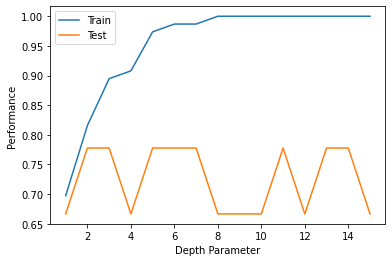

In [ ]:
# Now repeat the previous analysis (design model by changing the model depth 
#from 1 to 16) with smaller word dataset large_vocab_X


# Create the decision tree here Randomstate=42 90% training and 10% testing
# Train/Test Split
x_train_l, x_test_l, y_train, y_test = train_test_split(large_vocab_X, y, test_size=0.10, random_state=42)

#Create a loop of max depth from 1 to 16 similar to previous step and plot the accuracy 
train_errors_l = list()
test_errors_l = list()

for x in range(1,16): # Tree depth is varied in a loop from 3 to 10
  
  #Create multiple models here each based on the x variable above
  large_clf = tree.DecisionTreeClassifier(max_depth=x)
  large_clf = large_clf.fit(x_train_l,y_train)

  # Store the result of modes in train_erors and test_errors variables
  train_errors_l.append(large_clf.score(x_train_l, y_train)) # Train Errors
  test_errors_l.append(large_clf.score(x_test_l, y_test))    # Test Errors

# Plot of test and training errors
plt.plot(range(1,16),train_errors_l, label='Train') # Train Accuracy
plt.plot(range(1,16),test_errors_l, label='Test') # Test Accuracy
plt.legend(loc='upper left')
plt.xlabel('Depth Parameter')
plt.ylabel('Performance')

Text(0, 0.5, 'Performance')

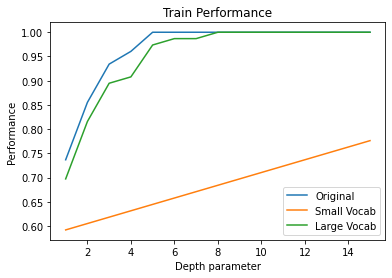

In [ ]:

# All Models Train Performance
plt.plot(range(1,16),train_errors, label='Original') # Original Train X
plt.plot(range(1,16),train_errors_s, label='Small Vocab') # Small Vocab Train Accuracy
plt.plot(range(1,16),train_errors_l, label='Large Vocab') # Large Vocab Train Accuracy
plt.title("Train Performance")
plt.legend(loc='lower right')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')


Text(0, 0.5, 'Performance')

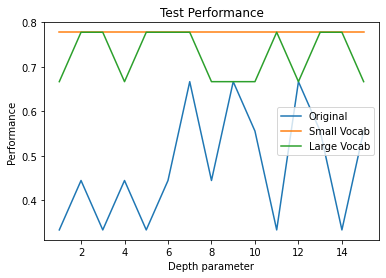

In [ ]:
# All Models Test Performance
plt.plot(range(1,16),test_errors, label='Original') # Orignal Test X
plt.plot(range(1,16),test_errors_s, label='Small Vocab') # Small Vocab Test Accuracy
plt.plot(range(1,16),test_errors_l, label='Large Vocab') # Large Vocab Test Accuracy
plt.title("Test Performance")
plt.legend(loc='center right')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')

In [ ]:
# Explain your understanding from the graph